<a href="https://colab.research.google.com/github/zobayer-al-mahmud/MNIST-Digit-Classifier/blob/main/MNIST_Digit_Classifier_(Zobayer_Al_Mahmud).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


# **2. Dataset Loading**

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(len(x_train))

60000


# **3. Preprocessing**

In [ ]:
# Normalize the data to [0, 1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images for a dense network
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
#check unique value of y_train
import numpy as np

# Count unique values and their counts in y_train
unique_values, counts = np.unique(y_train, return_counts=True)

# Print the unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")
print(len(y_train))


Value: 0.0, Count: 540000
Value: 1.0, Count: 60000
60000


# **4. Model Architecture**

In [ ]:
model = Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128),
    layers.BatchNormalization(),  # Normalize outputs of dense layer
    layers.LeakyReLU(alpha=0.01),  # Use LeakyReLU instead of standard ReLU
    layers.Dense(64),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


# **5. Training**

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,154 (430.29 KB)

 Trainable params: 109,770 (428.79 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.1)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8648 - loss: 0.4783 - val_accuracy: 0.9675 - val_loss: 0.1129
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9662 - loss: 0.1146 - val_accuracy: 0.9750 - val_loss: 0.0874
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9782 - loss: 0.0731 - val_accuracy: 0.9795 - val_loss: 0.0773
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9831 - loss: 0.0561 - val_accuracy: 0.9773 - val_loss: 0.0751
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9856 - loss: 0.0461 - val_accuracy: 0.9788 - val_loss: 0.0784
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9879 - loss: 0.0366 - val_accuracy: 0.9755 - val_loss: 0.0795
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9911 - loss: 0.0287 - val_accuracy: 0.9805 - val_loss: 0.0711
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9900 - loss: 0.0298 - val_accuracy: 0.

# **6. Visualization**

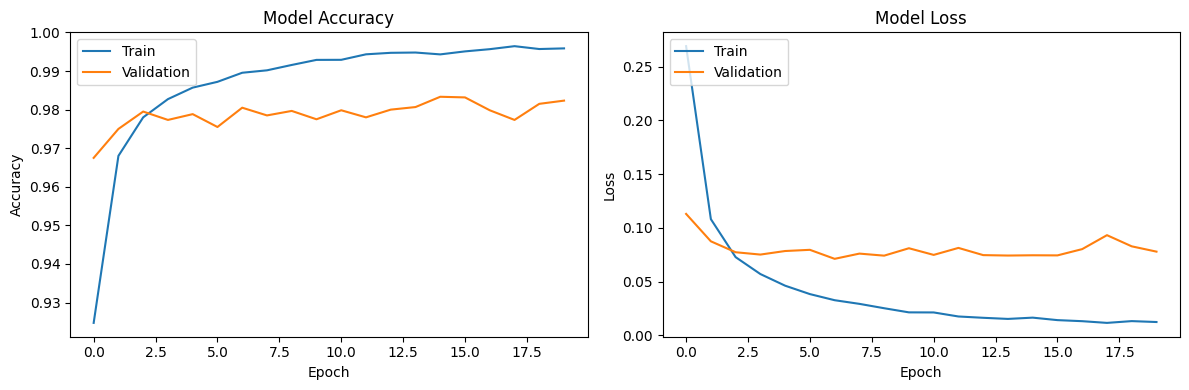

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

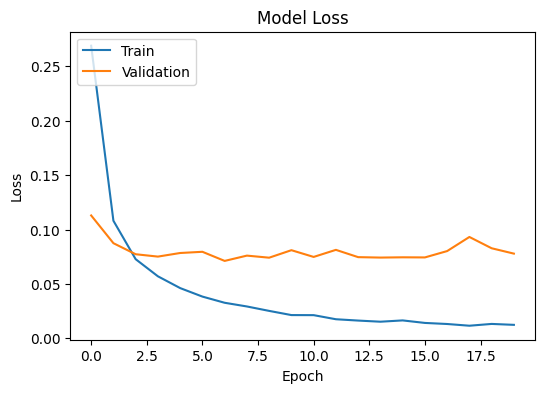

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **7. Evaluation**

In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9759 - loss: 0.0967
Test Accuracy: 98.11%
